<a href="https://colab.research.google.com/github/Khaled-Karam/Handwritten-Digit-Recognition-using-Neural-Network/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,  Input
from tensorflow.keras.utils import to_categorical

In [48]:
# Load and Explore the Dataset
train_data=pd.read_csv("/content/Train.csv")
print("shape of data", train_data.shape )

X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("shape of X after seperating features ", X.shape)


shape of data (42000, 785)
shape of X after seperating features  (42000, 784)


In [49]:
# Preprocess the Data
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)



Shape of X after reshaping: (42000, 28, 28, 1)


In [50]:
y.shape

(42000,)

In [51]:
# One-Hot Encode the Labels
y=to_categorical(y, num_classes=10)
print("shape of y after one hot encoding", y.shape)

shape of y after one hot encoding (42000, 10)


In [52]:
# Split the data
X_train,X_val,y_train,y_val=train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape ", X_train.shape)
print("y_train shape ", y_train.shape)

X_train shape  (33600, 28, 28, 1)
y_train shape  (33600, 10)


In [53]:
# Build the Neural Network Model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')

])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8386 - loss: 0.5419 - val_accuracy: 0.9460 - val_loss: 0.1820
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9588 - loss: 0.1392 - val_accuracy: 0.9588 - val_loss: 0.1361
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9738 - loss: 0.0860 - val_accuracy: 0.9635 - val_loss: 0.1201
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9814 - loss: 0.0613 - val_accuracy: 0.9713 - val_loss: 0.0984
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9865 - loss: 0.0430 - val_accuracy: 0.9720 - val_loss: 0.0976
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9899 - loss: 0.0357 - val_accuracy: 0.9679 - val_loss: 0.1065
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9917 - loss: 0.0282 - val_accuracy: 0.9718 - val_loss: 0.1061
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9927 - loss: 0.0224 -

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.1218
Validation Accuracy: 97.30%


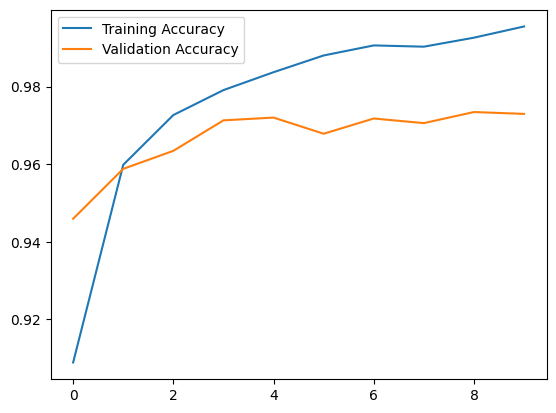

In [55]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


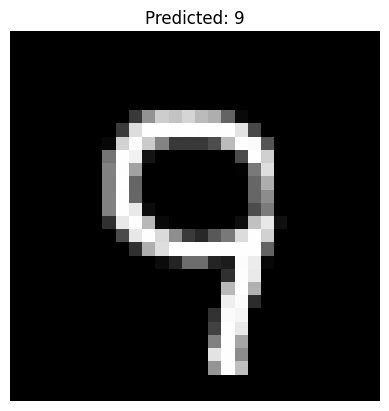

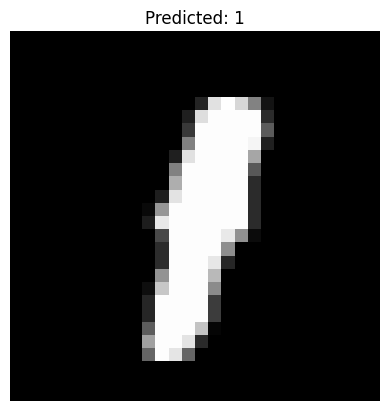

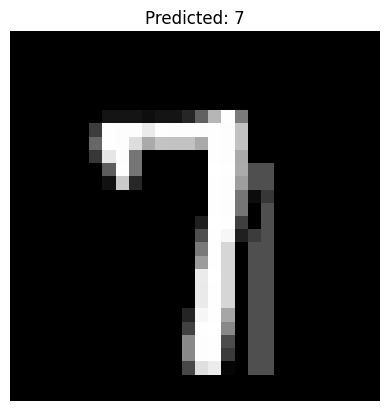

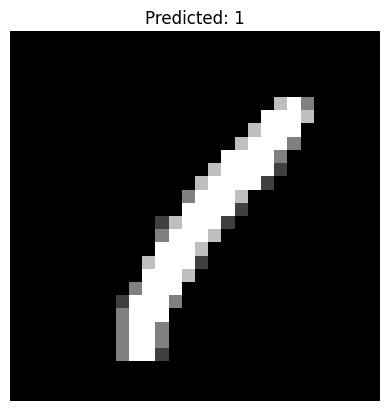

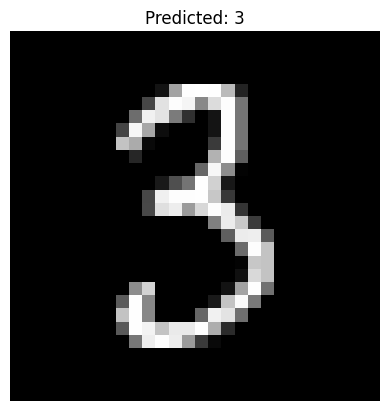

In [57]:
# Make Predictions
test_data = pd.read_csv('/content/test.zip')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()